In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/demand_forecasting_dataset/train.csv')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


## Analyze data

In [3]:
len(df.date.unique())

1826

In [4]:
f'Min date from train set: {df.date.min()}'


'Min date from train set: 2013-01-01'

In [5]:
f'Max date from train set: {df.date.max()}'

'Max date from train set: 2017-12-31'

In [6]:
df.store.unique(), len(df.store.unique())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 10)

In [7]:
df.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [8]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


## Visualize data

In [9]:
def visualize_sales_date(data):
    plt.figure(figsize=(30,10))
    sns.lineplot(
        data=data.sample(frac=0.5).sort_index(),
        x='date',
        y='sales'
    )
    plt.show()

### Overall sales

In [10]:
daily_sales_df = df.groupby('date', as_index=False).sales.sum()
daily_sales_df

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
...,...,...
1821,2017-12-27,20378
1822,2017-12-28,21885
1823,2017-12-29,23535
1824,2017-12-30,24988


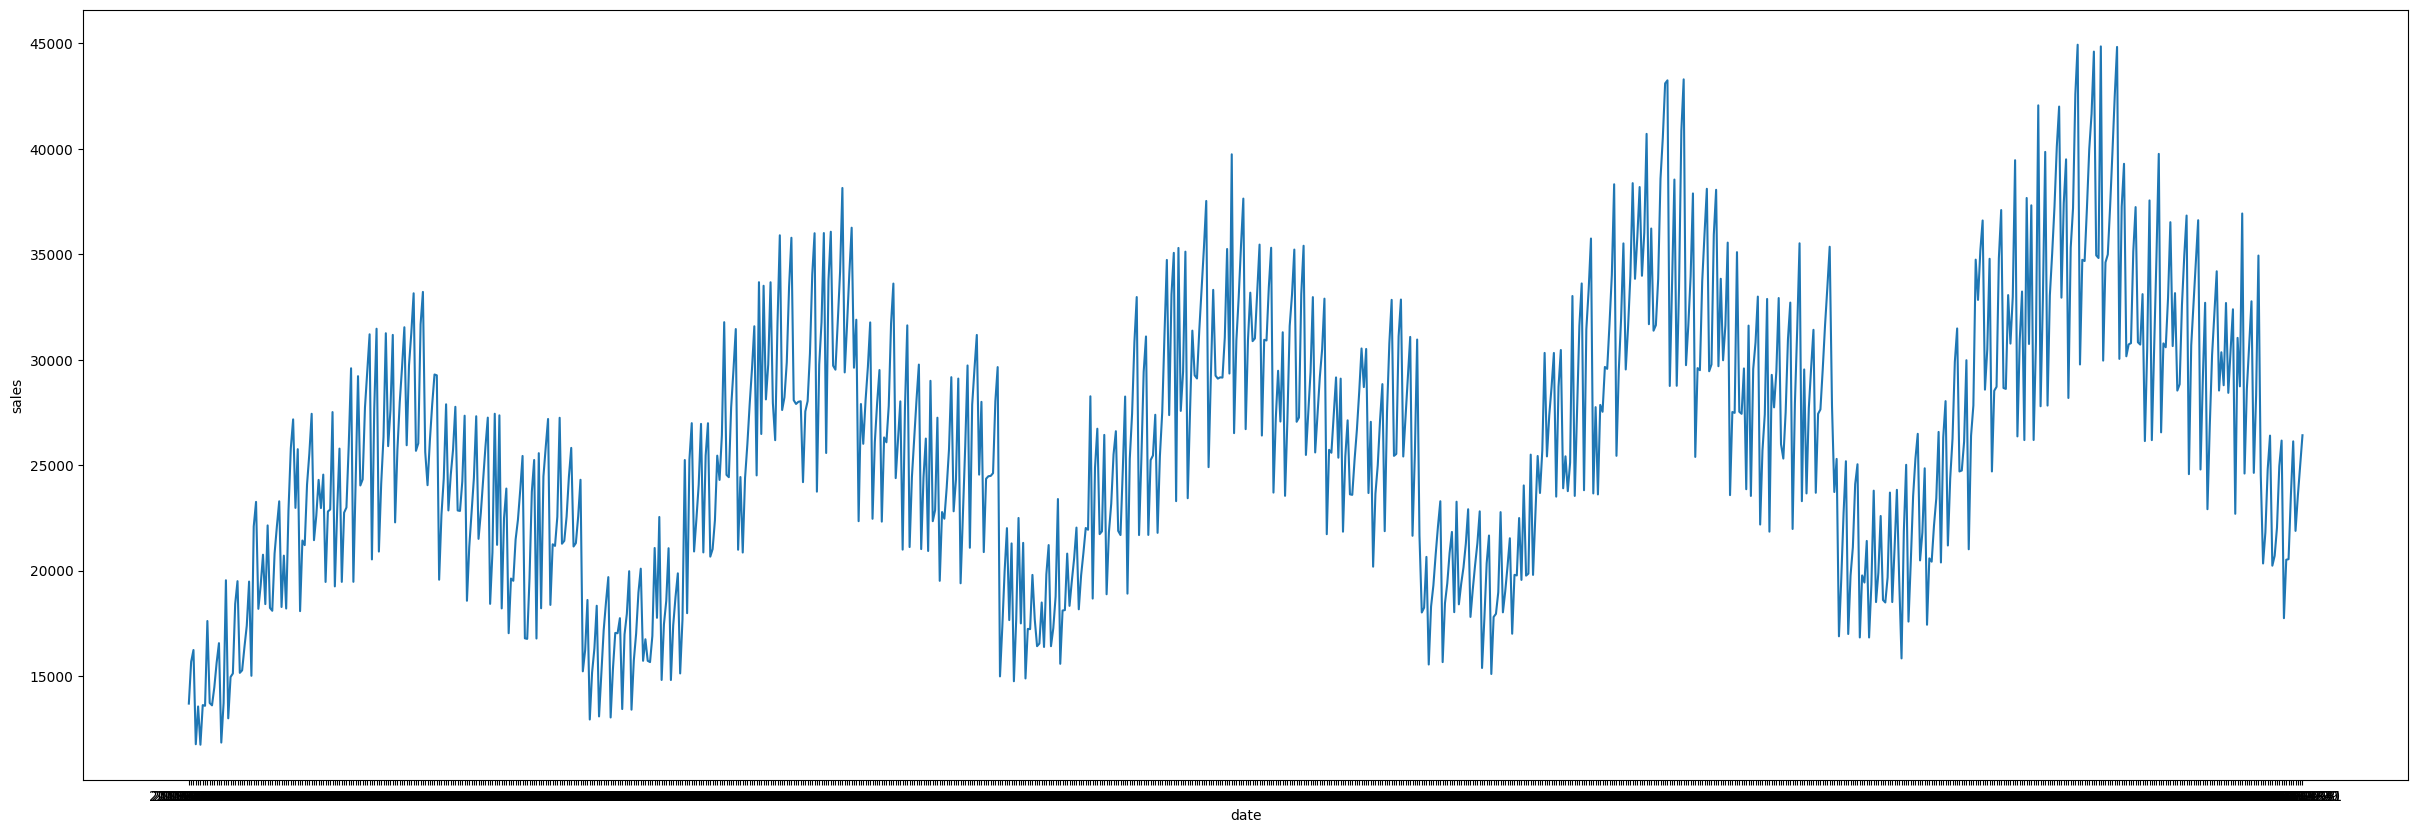

In [11]:
visualize_sales_date(daily_sales_df)

### Sales by store

In [12]:
store_daily_sales_df = df.groupby(['date', 'store'], as_index=False).sales.sum()
store_daily_sales_df

,date,store,sales
0,2013-01-01,1,1316
1,2013-01-01,2,1742
2,2013-01-01,3,1588
3,2013-01-01,4,1423
4,2013-01-01,5,1032
...,...,...,...
18255,2017-12-31,6,2009
18256,2017-12-31,7,1831
18257,2017-12-31,8,3205
18258,2017-12-31,9,2774


store_id 1


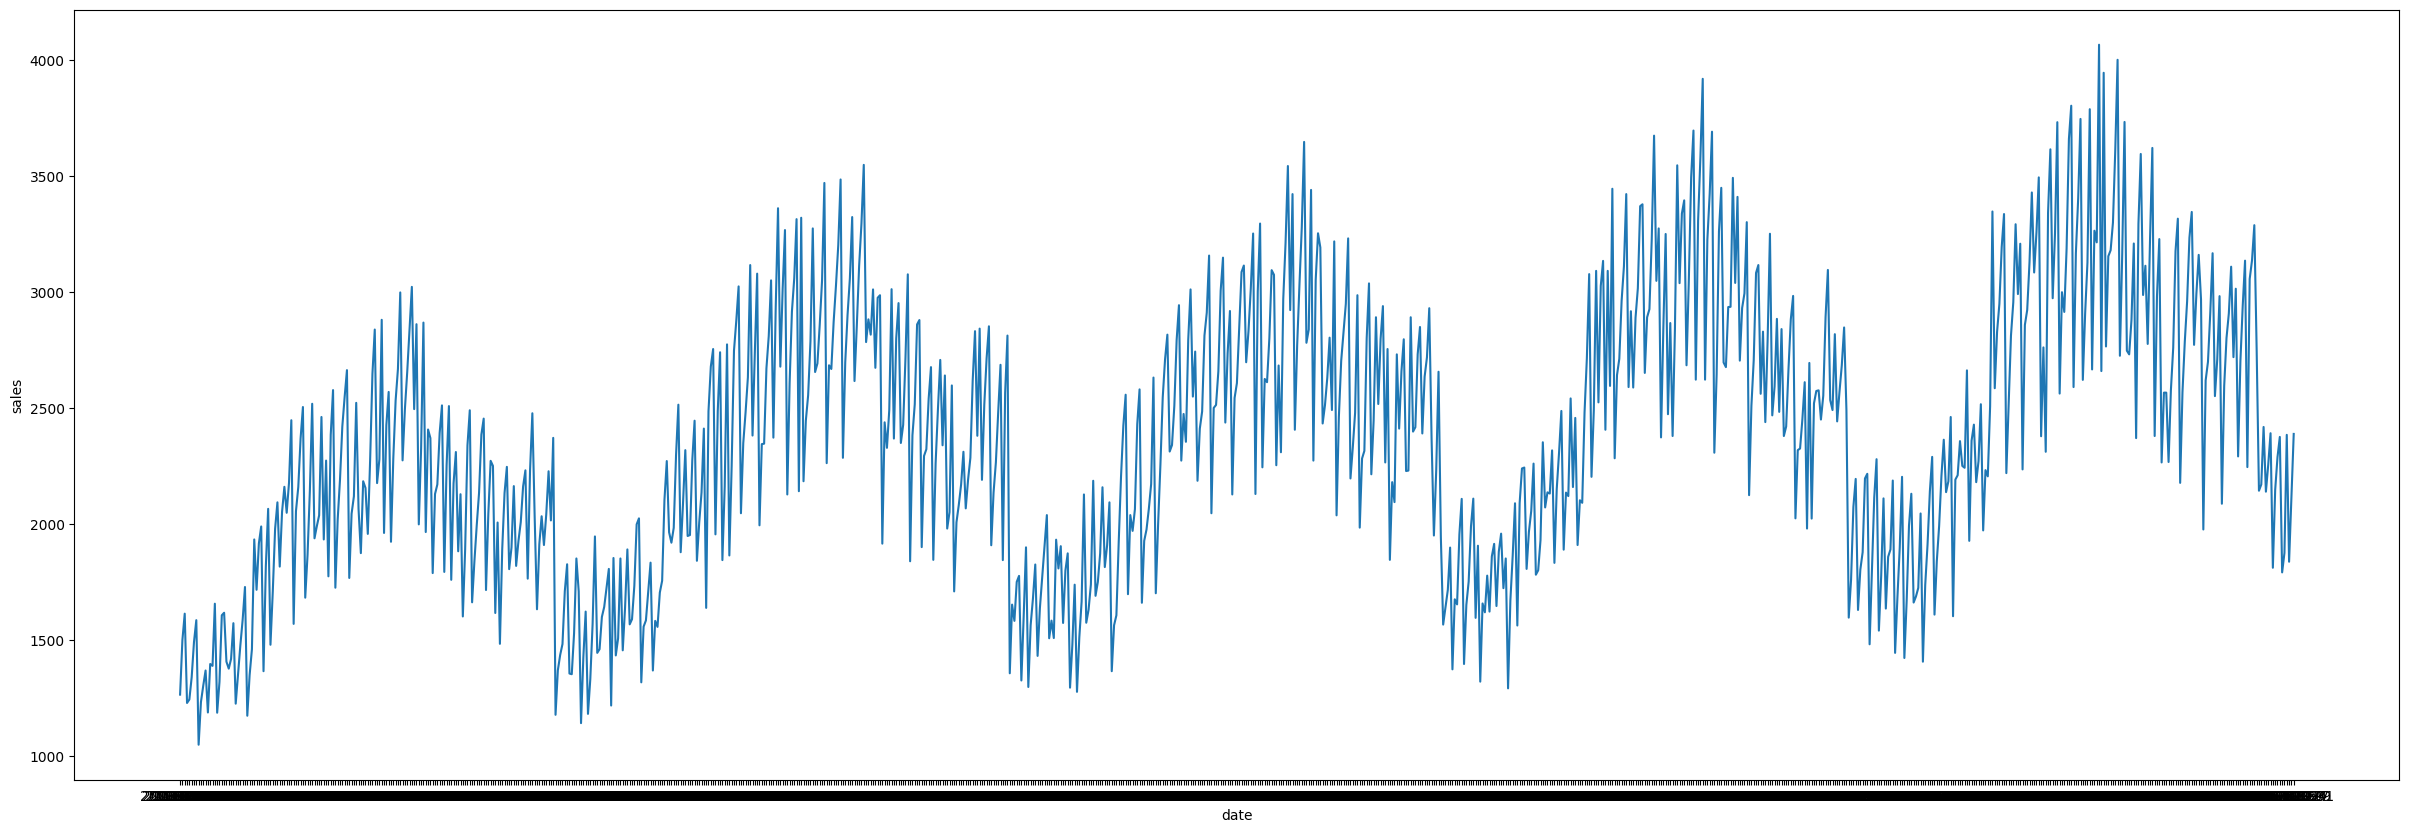

In [13]:
for store_id in df.store.unique():
    print('store_id', store_id)
    visualize_sales_date(
        store_daily_sales_df[store_daily_sales_df.store == store_id]
    )
    break

### Sales by item

In [14]:
item_daily_sales_df = df.groupby(['date', 'item'], as_index=False).sales.sum()
item_daily_sales_df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


item_id 1


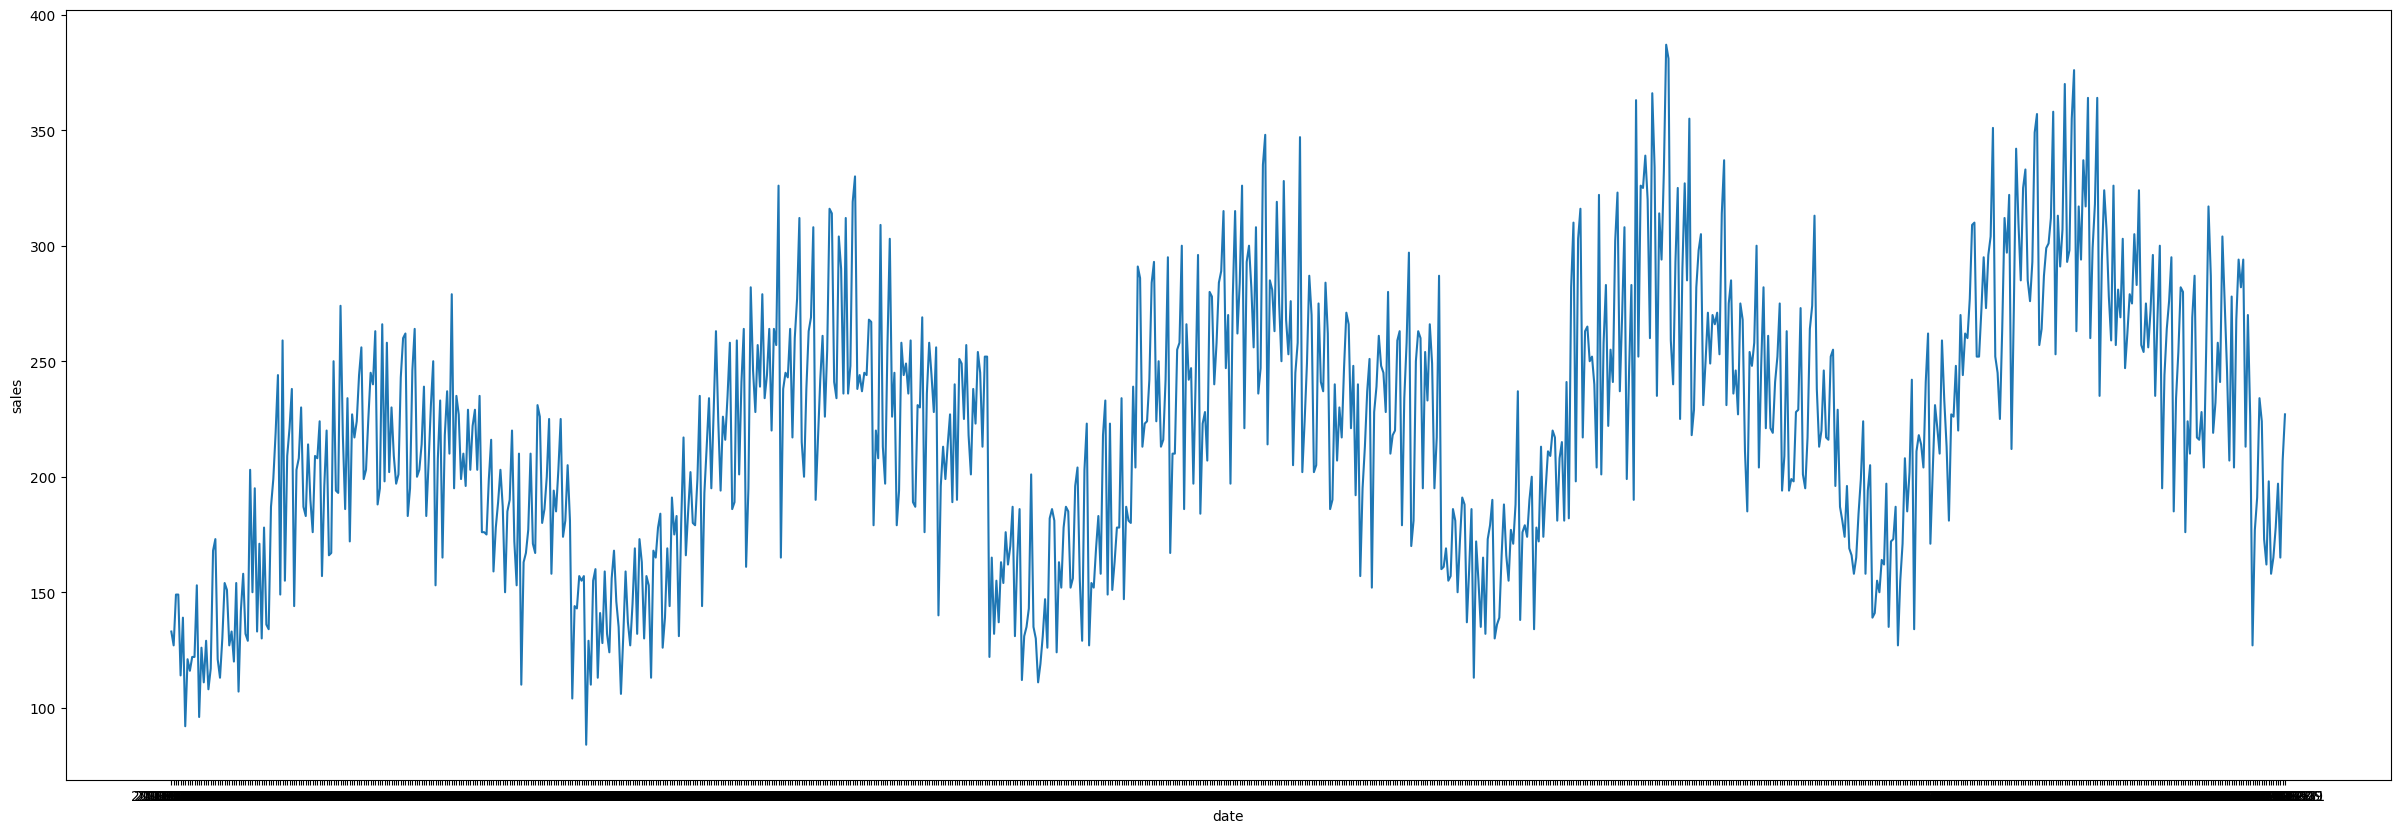

In [15]:
for item_id in df.item.unique():
    print('item_id', item_id)
    visualize_sales_date(
        item_daily_sales_df[item_daily_sales_df.item == 1]
    )
    break

## Prepare time series supervised label

In [16]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [17]:
# Group all data by store and item
# We solve time series problem of predicting sales of all items of all store
sales_df = df.groupby(by='date', as_index=False).agg({'sales': np.mean})
sales_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_93067/2508441844.py:3: FutureWarning: The provided callable <function mean at 0x103a02a20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sales_df = df.groupby(by='date', as_index=False).agg({'sales': np.mean})


,date,sales
0,2013-01-01,27.392
1,2013-01-02,27.356
2,2013-01-03,28.976
3,2013-01-04,31.354
4,2013-01-05,32.474
...,...,...
1821,2017-12-27,40.756
1822,2017-12-28,43.770
1823,2017-12-29,47.070
1824,2017-12-30,49.976


In [18]:
def series2supervised_label(series, window_size, lag_size):
    series_list, col_names = [], []
    for w in range(window_size + 1, 1, -1):
        series_list.append(series.shift(w))
        col_names.append(f't-{w - 2}' if w - 2 != 0 else 't')

    _df = pd.concat(series_list, axis=1)
    _df.columns = col_names

    return _df.dropna()

In [19]:
WINDOW_SIZE = 5
LAG_SIZE = 1

df_with_label = series2supervised_label(sales_df.sales, WINDOW_SIZE, LAG_SIZE)
df_with_label

,t-4,t-3,t-2,t-1,t
6,27.392,27.356,28.976,31.354,32.474
7,27.356,28.976,31.354,32.474,34.582
8,28.976,31.354,32.474,34.582,23.538
9,31.354,32.474,34.582,23.538,27.120
10,32.474,34.582,23.538,27.120,27.756
...,...,...,...,...,...
1821,44.428,47.134,49.526,52.260,35.034
1822,47.134,49.526,52.260,35.034,41.476
1823,49.526,52.260,35.034,41.476,40.756
1824,52.260,35.034,41.476,40.756,43.770


## Split training and validation set

In [20]:
VAL_PERCENT = 0.2

In [21]:
train_df = df_with_label.iloc[:int(1 - VAL_PERCENT * len(df_with_label))]
train_df

,t-4,t-3,t-2,t-1,t
6,27.392,27.356,28.976,31.354,32.474
7,27.356,28.976,31.354,32.474,34.582
8,28.976,31.354,32.474,34.582,23.538
9,31.354,32.474,34.582,23.538,27.120
10,32.474,34.582,23.538,27.120,27.756
...,...,...,...,...,...
1458,45.098,48.374,50.390,33.662,38.682
1459,48.374,50.390,33.662,38.682,39.120
1460,50.390,33.662,38.682,39.120,42.222
1461,33.662,38.682,39.120,42.222,44.592


In [22]:
x_train = train_df[['t-4', 't-3', 't-2', 't-1']]
y_train = train_df['t']

x_train.shape, y_train.shape

((1457, 4), (1457,))

In [23]:
val_df = df_with_label.iloc[int(1 - VAL_PERCENT * len(df_with_label)):]
val_df

,t-4,t-3,t-2,t-1,t
1463,39.120,42.222,44.592,47.584,47.418
1464,42.222,44.592,47.584,47.418,31.544
1465,44.592,47.584,47.418,31.544,37.300
1466,47.584,47.418,31.544,37.300,37.020
1467,47.418,31.544,37.300,37.020,39.790
...,...,...,...,...,...
1821,44.428,47.134,49.526,52.260,35.034
1822,47.134,49.526,52.260,35.034,41.476
1823,49.526,52.260,35.034,41.476,40.756
1824,52.260,35.034,41.476,40.756,43.770


In [24]:
x_val = val_df[['t-4', 't-3', 't-2', 't-1']]
y_val = val_df['t']

x_val.shape, y_val.shape

((363, 4), (363,))